
<h1><center><font color="#006666">DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP</font></h1>
      
   

<h2><center><font color="#006666">The Sparks Foundation</font></h2>
<h3><center><font color="#006666">By - Mrinal Chandra Mishra</font></h3>

<h2><center><font color="#006666">TASK-4 Exploratory Data Analysis On Terrorism data</font></h2>

In [45]:
#!pip install missingno

#### We will start with importing some useful libraries for EDA

In [46]:
# some useful import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno                                                     # to visulize null values

%matplotlib inline

In [47]:
 #collecting data
df=pd.read_csv(r'globalterrorismdb_0718dist.csv',encoding='latin1')                      # reading csv
df.head(6)                                                                               #showing 6 records

C:\Users\mrina\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN


#### As we are done with Collecting data lets gain some info about data

In [48]:
print('shape of data is ',df.shape)                                                      # printing the shaPE OF our data

shape of data is  (181691, 135)


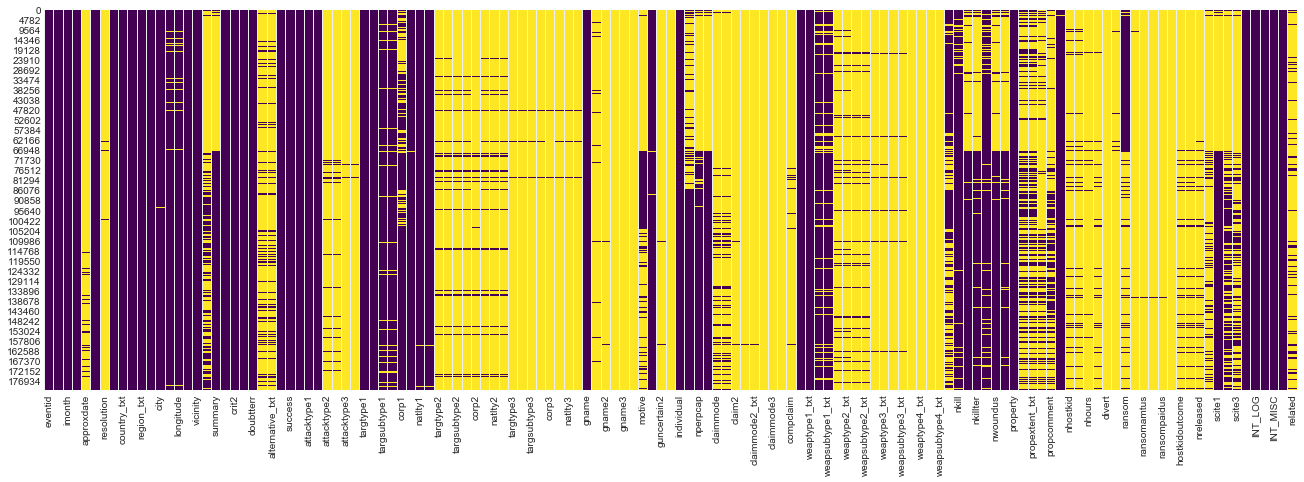

In [49]:
# before moving any further lets check for null values
plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(),cbar=False,cmap="viridis")                                         # analysing null values

#### As we can see that there are lots of null value in the data.....and it is actually confusing so lets check which columns have how much null value

In [50]:
print('here we will check for the count of null value in each columns')
count=0                                                     # this will help us to count how many col have null value
# this for loop iterate through all the columns and count the % of null value in each col

col_list=[]
for col in df.columns:
    if df[col].isnull().sum() >0 :
        count=count+1
        null_prcnt=(df[col].isnull().sum()/181691)*100
        print('col name-',col,'null %',null_prcnt)
        if null_prcnt >40 :
            col_list.append(col)
        
print('total no of columns having null values-',count)

here we will check for the count of null value in each columns
col name- approxdate null % 94.91499303762983
col name- resolution null % 98.77814531264619
col name- provstate null % 0.23171208260177995
col name- city null % 0.23886708752772565
col name- latitude null % 2.507554034046816
col name- longitude null % 2.5081044190411195
col name- specificity null % 0.0033023099658210917
col name- location null % 69.45638474112641
col name- summary null % 36.396409288297164
col name- doubtterr null % 0.0005503849943035153
col name- alternative null % 84.03278093026071
col name- alternative_txt null % 84.03278093026071
col name- multiple null % 0.0005503849943035153
col name- attacktype2 null % 96.52486914596761
col name- attacktype2_txt null % 96.52486914596761
col name- attacktype3 null % 99.7644352224381
col name- attacktype3_txt null % 99.7644352224381
col name- targsubtype1 null % 5.709143545910364
col name- targsubtype1_txt null % 5.709143545910364
col name- corp1 null % 23.418881507614

Now as we can see that out of 163 columns there are 106 columns which have more than 0% null value so our data is less informative.Before moving any further lets drop those columns which have null values more than 40%.

In [51]:
# now check how much columns have null value > 40%
print('total no of columns-',len(col_list))

total no of columns- 77


In [52]:
# we should drop these columns to simplify our analysis
df.drop(col_list,axis=1,inplace=True)
print(df.shape)

(181691, 58)


<h4><center><font color="#006666">By doint this we have lose some information... but at a same time we have also reduced the complexity of data</font></h4>

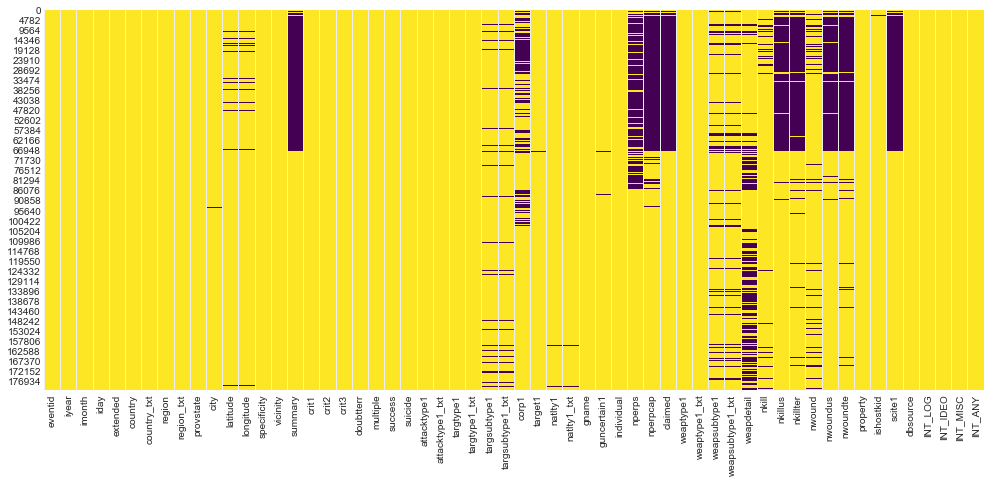

In [53]:
# now check for the null values in data
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),cmap='viridis_r',cbar=False)

### allright now we can move further and do our analysis. As now we have only left with 58 columns which are some extent to important.

In [54]:
# lets check for unique value
for col in df.columns:
    print(col,len(df[col].unique()))

eventid 181691
iyear 47
imonth 13
iday 32
extended 2
country 205
country_txt 205
region 12
region_txt 12
provstate 2856
city 36675
latitude 48323
longitude 48040
specificity 6
vicinity 3
summary 112493
crit1 2
crit2 2
crit3 2
doubtterr 4
multiple 3
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
targtype1 22
targtype1_txt 22
targsubtype1 113
targsubtype1_txt 113
corp1 33239
target1 86007
natlty1 216
natlty1_txt 216
gname 3537
guncertain1 3
individual 2
nperps 114
nperpcap 51
claimed 4
weaptype1 12
weaptype1_txt 12
weapsubtype1 31
weapsubtype1_txt 31
weapdetail 19149
nkill 206
nkillus 32
nkillter 97
nwound 239
nwoundus 45
nwoundte 45
property 3
ishostkid 4
scite1 83989
dbsource 26
INT_LOG 3
INT_IDEO 3
INT_MISC 3
INT_ANY 3


In [55]:
# lets check the dtypes of data
cat_count=0
num_count=0
cat_col_list=[]
num_col_list=[]
for col in df.columns:
    if df[col].dtypes == 'object':
        cat_count=cat_count+1
        cat_col_list.append(col)
    else:
        num_count=num_count+1
        num_col_list.append(col)
        
print('total no of categorical feature - ',cat_count)
print('total no of Numerical feature - ',num_count)

total no of categorical feature -  17
total no of Numerical feature -  41


* As now you can see that we have 17 categorical columns 
* and 41 numerical columns
- Now we will split our numerical and categorical columns differently.

In [56]:
# lets split categorical and numerical columns 
df_cat=df[cat_col_list]                                                # categorical columns are in df_cat
df_numr=df[num_col_list]                                               # numr columns are in df_numr

Why we have splitted numr and cat columns
* To analyse numr value and cat value individuallly
* It will be easy for us to apply particular analysis function

<h1><center><font color="#006666">EDA on Categorical value</font></h1>

In [57]:
df_cat.head()

,country_txt,region_txt,provstate,city,summary,attacktype1_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,scite1,dbsource
0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,Assassination,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,MANO-D,Unknown,NaN,NaN,NaN,PGIS
1,Mexico,North America,Federal,Mexico city,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,23rd of September Communist League,Unknown,NaN,NaN,NaN,PGIS
2,Philippines,Southeast Asia,Tarlac,Unknown,NaN,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,Unknown,Unknown,NaN,NaN,NaN,PGIS
3,Greece,Western Europe,Attica,Athens,NaN,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,Unknown,Explosives,Unknown Explosive Type,Explosive,NaN,PGIS
4,Japan,East Asia,Fukouka,Fukouka,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,Unknown,Incendiary,NaN,Incendiary,NaN,PGIS


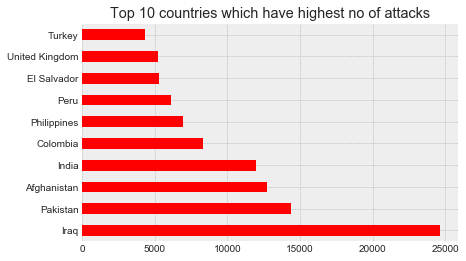

In [58]:
# lets check top 10 country have the highest terrorist attack
df_cat['country_txt'].value_counts()[:10].plot(kind='barh',cmap='prism')
plt.title('Top 10 countries which have highest no of attacks')
plt.style.use('fivethirtyeight')


* As we can see that iraq have the highest no of attacks. the above graph shows the Top 10 affected country by terrorist.

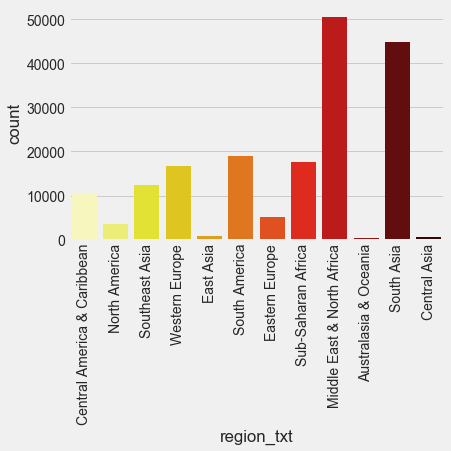

In [59]:
# now we will check for region wise
sns.countplot(df['region_txt'],palette='hot_r')
plt.xticks(rotation=90)
plt.style.use('bmh')



from the above graph we can conclude that
* middle east and north Africa have the highest no of attacks 
* australia and Oceania have lesser attcks

Text(0.5, 1.0, 'Profession who have been attacked')

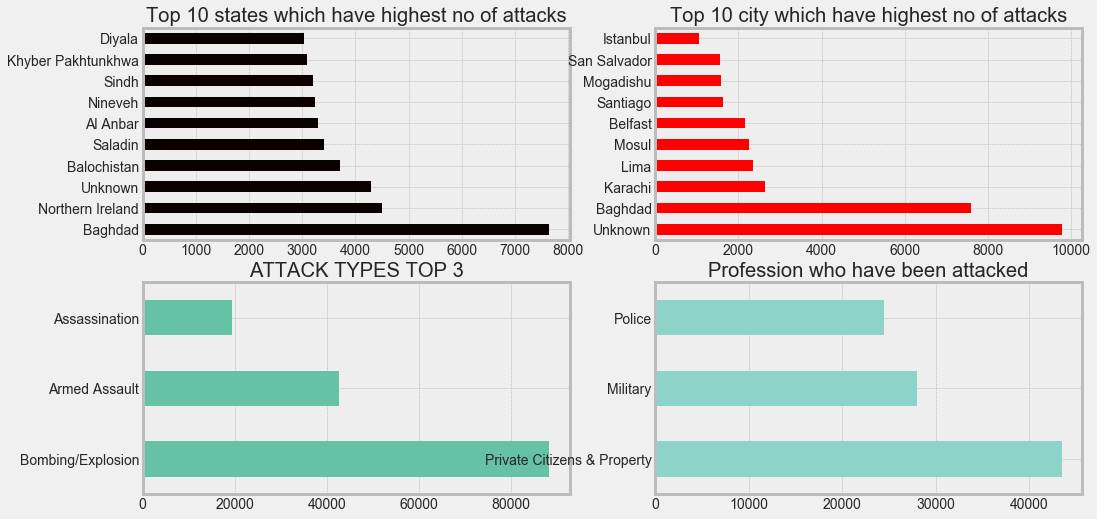

In [60]:
fig,ax=plt.subplots(2,2,figsize=(15,8))

# Top 10 states having highest no of attacks
df_cat['provstate'].value_counts()[:10].plot(kind='barh',cmap='hot',ax=ax[0][0])
ax[0][0].set_title('Top 10 states which have highest no of attacks')

# Top 10 City having highest no of attacks
df_cat['city'].value_counts()[:10].plot(kind='barh',cmap='prism',ax=ax[0][1])
ax[0][1].set_title('Top 10 city which have highest no of attacks')

# Top 3 type of attack
df_cat['attacktype1_txt'].value_counts()[:3].plot(kind='barh',cmap='Set2',ax=ax[1][0])
ax[1][0].set_title('ATTACK TYPES TOP 3')

# Top 3 type of attack
df_cat['targtype1_txt'].value_counts()[:3].plot(kind='barh',cmap='Set3',ax=ax[1][1])
ax[1][1].set_title('Profession who have been attacked')









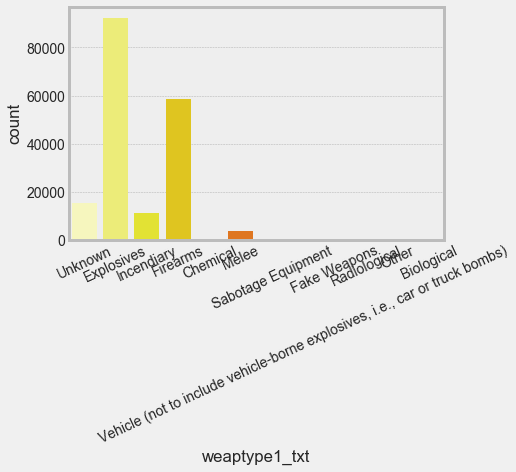

In [61]:
# now lets look for the weapon types
sns.countplot(df['weaptype1_txt'],palette='hot_r')
plt.xticks(rotation=25)
plt.style.use('bmh')


<h2><center><font color="#006666">Bivariate Analysis</font></h2>

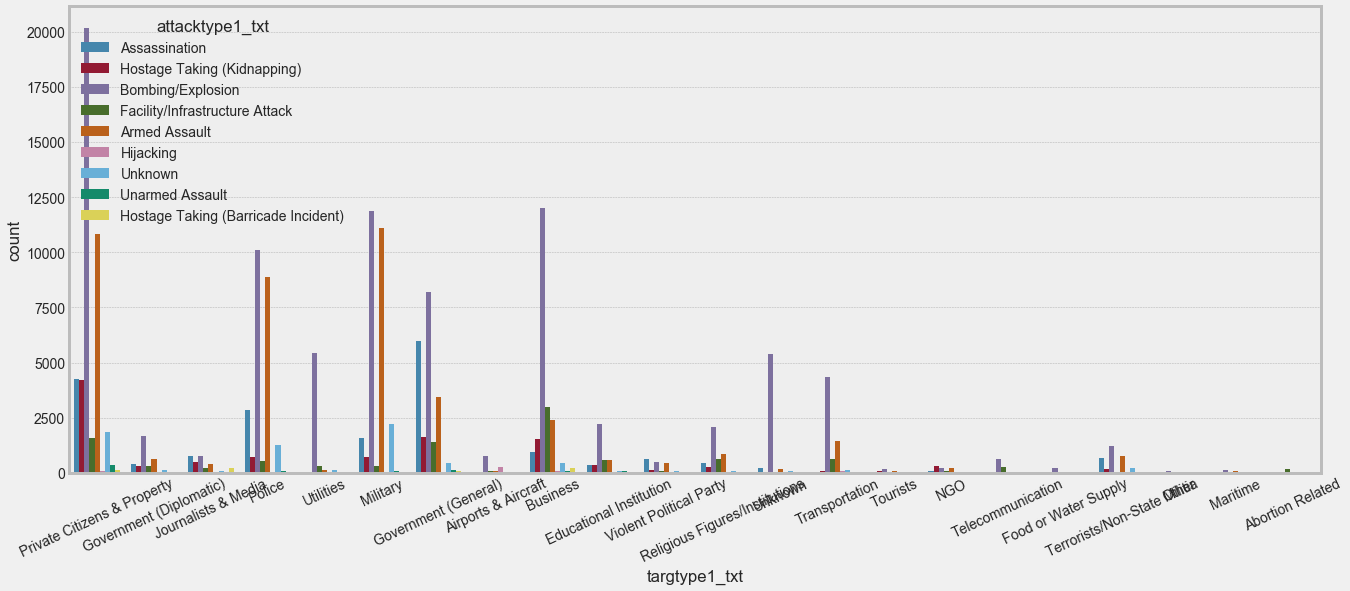

In [62]:
# Now we will analyse which profesion is attacked by what type of attack
plt.figure(figsize=(20,8))
sns.countplot(df_cat['targtype1_txt'],hue=df_cat['attacktype1_txt'])
plt.xticks(rotation=25)
plt.style.use('seaborn-dark')

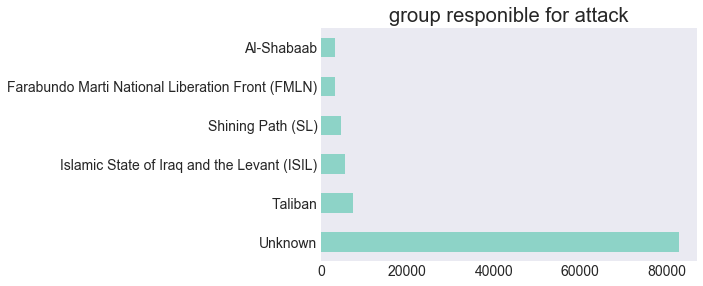

In [65]:
# now lets look for the gname or which group are responsible for attacks TOP-6
df_cat['gname'].value_counts()[:6].plot(kind='barh',cmap='Set3')
plt.title('group responible for attack')
plt.show()

<h1><center><font color="#99ff66">NOW WE WILL DO ANALYSIS ON NUMERIC FEATURE</font></h1>

In [67]:
df_numr.head()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,2,18.456792,-69.951164,1.0,...,NaN,0.0,NaN,NaN,0,0.0,0,0,0,0
1,197000000002,1970,0,0,0,130,1,19.371887,-99.086624,1.0,...,NaN,0.0,NaN,NaN,0,1.0,0,1,1,1
2,197001000001,1970,1,0,0,160,5,15.478598,120.599741,4.0,...,NaN,0.0,NaN,NaN,0,0.0,-9,-9,1,1
3,197001000002,1970,1,0,0,78,8,37.997490,23.762728,1.0,...,NaN,NaN,NaN,NaN,1,0.0,-9,-9,1,1
4,197001000003,1970,1,0,0,101,4,33.580412,130.396361,1.0,...,NaN,NaN,NaN,NaN,1,0.0,-9,-9,1,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

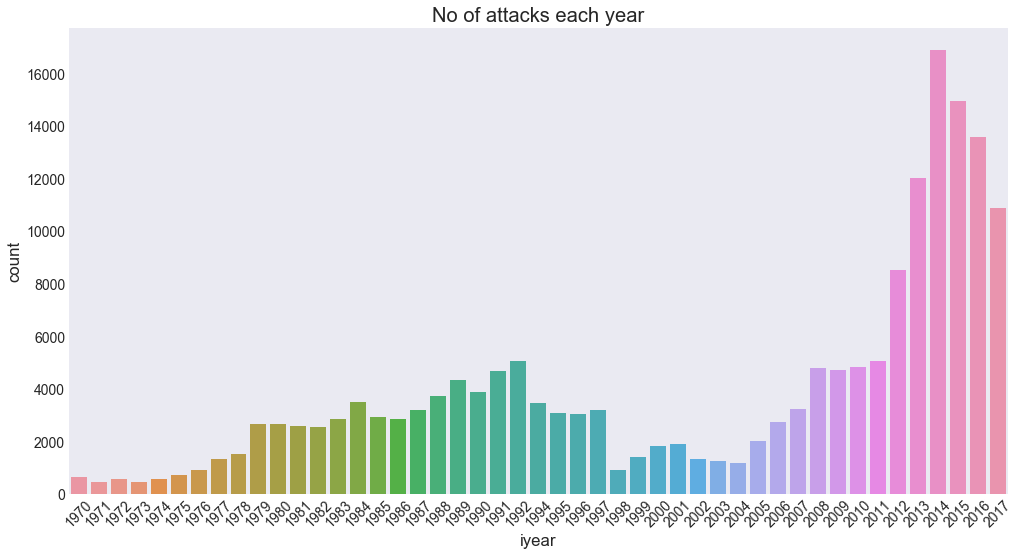

In [76]:
# no of attack each year
plt.figure(figsize=(15,8))
sns.countplot(df_numr['iyear'])
plt.title('No of attacks each year')
plt.xticks(rotation=45)

* as we can see that from 2012 we have a slight increase in terrorist activity.
* in 2013 it was the highest of more than 16000 attacks in all over the world.

In [87]:
df_numr.describe()                                      # this code will describe eveything about numerical feature

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nkillter,nwound,nwoundus,nwoundte,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,0.508058,3.167668,0.038944,0.107163,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,4.199937,35.949392,3.057361,1.488881,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,500.000000,8191.000000,751.000000,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
df_numr.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'nperps', 'nperpcap', 'claimed', 'weaptype1', 'weapsubtype1', 'nkill',
       'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property',
       'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

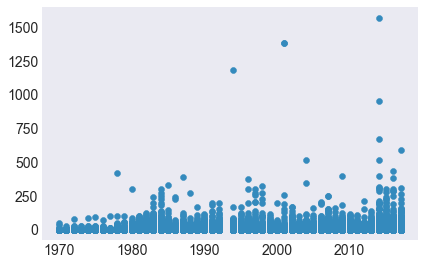

In [96]:
plt.scatter(y=df_numr['nkill'],x=df_numr['iyear'])

In [100]:
# lets count the vales of total no of people killed
print('total no of people killed',df_numr['nkill'].sum())
print('total no of people injured',df_numr['nwound'].sum())

total no of people killed 411868.0
total no of people injured 523869.0


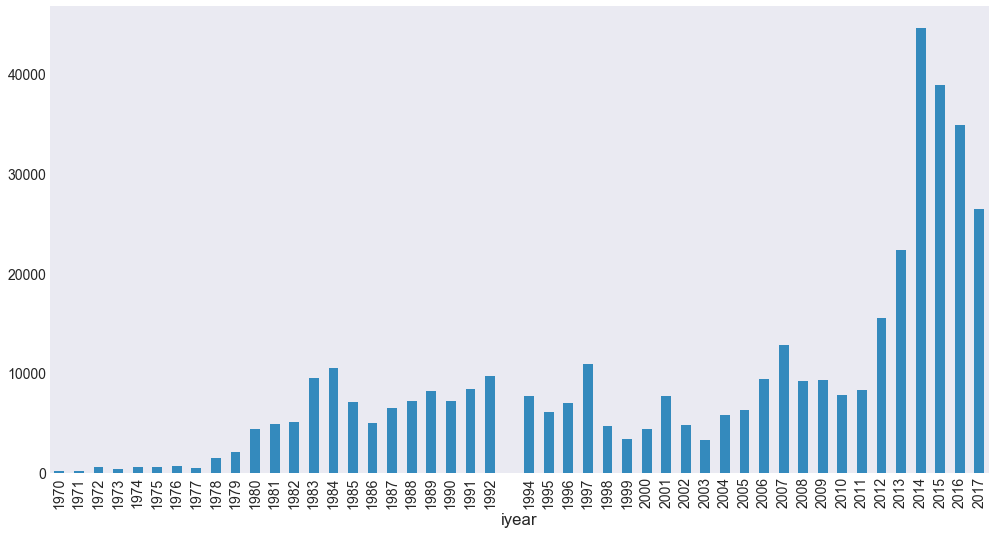

In [108]:
# No of people killed by year
plt.figure(figsize=(15,8))
df_numr.groupby(['iyear'])['nkill'].sum().plot(kind='bar')

SO thats it.... we are done with data Analysis process. and these analyssis will help us to know about things related to activity.

<h1><center><font color=" #3377ff">Conclusion And what we get from Analyis</font></h1>

* **WE got the size of data**
* **WE got the visulization related Null Data**
* **WE got the visulization related Unique data**
* **We have check Top10 country having highest attacks**
* **WE also check for attacktype,weapontype,person who have been attacked and all**
* **WE calculate No of people killed each year in attack**
* **Year in Which highest attack have happend**

<h1><center><font color=" #3bdc7ff">Thankyou</font></h1>